In [1]:
# import libraries
import random
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, HTML

# bet of hands
BET_BANKER = "banker"
BET_PLAYER = "player"
BET_TIE = "tie"

# probability occurance of bet of hands
probability_banker = 46
probability_player = 46
probability_tie = 8
# payout ratio
win_payout = 1
tie_payout = 8
# 5% commission for the house
win_commission = 0.05
# each player's initial balance
initial_balance = 10000000

FIG_WIDTH = 16
FIG_HEIGHT = 10

'''
Two players bet on banker and player respectively with different amount
* 2 players play baccarat
* player 1 bet on banker with excessive amount more than player 2
* player 2 bet on player with way less amount
* the probability settings defined in cell "configuration settings"
* this test aims to evaluate the long term result after many rounds (>1000) of playing
'''


'\nTwo players bet on banker and player respectively with different amount\n* 2 players play baccarat\n* player 1 bet on banker with excessive amount more than player 2\n* player 2 bet on player with way less amount\n* the probability settings defined in cell "configuration settings"\n* this test aims to evaluate the long term result after many rounds (>1000) of playing\n'

In [2]:
class Player:
    def __init__(self, name, balance):
        self.name = name
        self.initial_amount = balance
        self.balance = balance
        self.bet = ""
        self.bet_amount = 0
    def place_bet(self, bet, amount):
        self.bet_hand = bet
        self.bet_amount = amount
    def pay_collect(self, result):
        win_loss = 0
        if self.bet_hand == "":
            # player did not bet, no win nor lose
            pass
        elif result == self.bet_hand:
            # player's bet win
            payout = 0
            if result == BET_BANKER:
                payout = win_payout
            elif result == BET_PLAYER:
                payout = win_payout
            elif result == BET_TIE:
                payout = tie_payout
            win = payout * self.bet_amount
            win_loss = win * (1 - win_commission)
        else:
            # player's bet losed
            payout = 0
            if result == BET_BANKER:
                payout = win_payout
            elif result == BET_PLAYER:
                payout = win_payout
            else:
                payout = 0
            win_loss = -1 * payout * self.bet_amount
        self.balance += win_loss
        return win_loss

class Baccarat:
    def __init__(self, player, probability_banker, probability_player, probability_tie):
        self.player = player
        self.probability_banker = probability_banker
        self.probability_player = probability_player
        self.probability_tie = probability_tie
        self.balance = 0
        self.bet_record = []
        self.record_index = 0
    def deal(self):
        num_random = random.randrange(0, 100)
        if num_random < self.probability_banker:
            result = BET_BANKER
        elif num_random < (self.probability_banker + self.probability_player):
            result = BET_PLAYER
        else:
            result = BET_TIE
        return result
    def conclude(self, result):
        profitloss = 0
        for i in player:
            win_loss = player[i].pay_collect(result)
            self.bet_record.append({"match": self.record_index, "result": result, "player": player[i].name, "winloss": win_loss})
            profitloss -= win_loss
        self.balance += profitloss
        self.bet_record.append({"match": self.record_index, "result": result, "player": "house", "winloss": profitloss})
        self.record_index += 1
    def print(self):
        print("result player winloss")
        for record in self.bet_record:
            print("{0} {1} {2}".format(record['result'], record['player'], record['winloss']))
    def df(self):
        df = pd.DataFrame.from_dict(self.bet_record)
        return df

def show_result(bet_record_df):
    # plot balanace
    display(HTML('<h3>All players cumulative balance</h3>'))
    df_winloss = bet_record_df[['match', 'player', 'winloss']]
    df = df_winloss.pivot(index=['match'], columns=['player'], values=['winloss'])
    df_cumsum_all = df.cumsum()
    df_cumsum_all.plot(figsize=(FIG_WIDTH, FIG_HEIGHT))
    plt.show()
    # display(HTML('<h3>House cumulative balance</h3>'))
    # df_cumsum_1 = df_cumsum_all['winloss']['house']
    # df_cumsum_1.plot(figsize=(FIG_WIDTH, FIG_HEIGHT))
    # plt.show()

    # show statistic
    display(HTML('<h3>Game result statistic</h3>'))
    display(HTML('<h4>Number of matches played</h4>'))
    player_group = bet_record_df.groupby('player')
    num_matches = player_group.get_group('house')['match'].count()
    print(num_matches)
    display(HTML('<h4>Percentage occurence of different result</h4>'))
    print(player_group.get_group('house').value_counts(['result'], normalize=True))
    display(HTML('<h4>Win-Loss after final match</h4>'))
    print(df_cumsum_all['winloss'].iloc[[-1]])
    display(HTML('<h4>Max draw-down</h4>'))
    print(df_cumsum_all['winloss'].min())


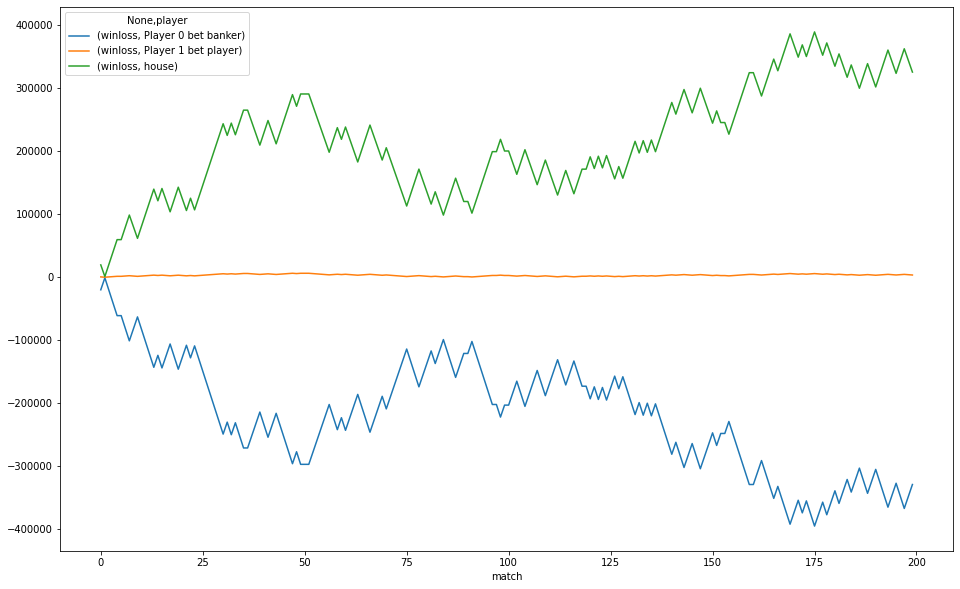

200


result
player    0.505
banker    0.445
tie       0.050
dtype: float64


player  Player 0 bet banker  Player 1 bet player     house
match                                                     
199               -329000.0               3475.0  325525.0


player
Player 0 bet banker   -395000.0
Player 1 bet player       -25.0
house                    1025.0
dtype: float64


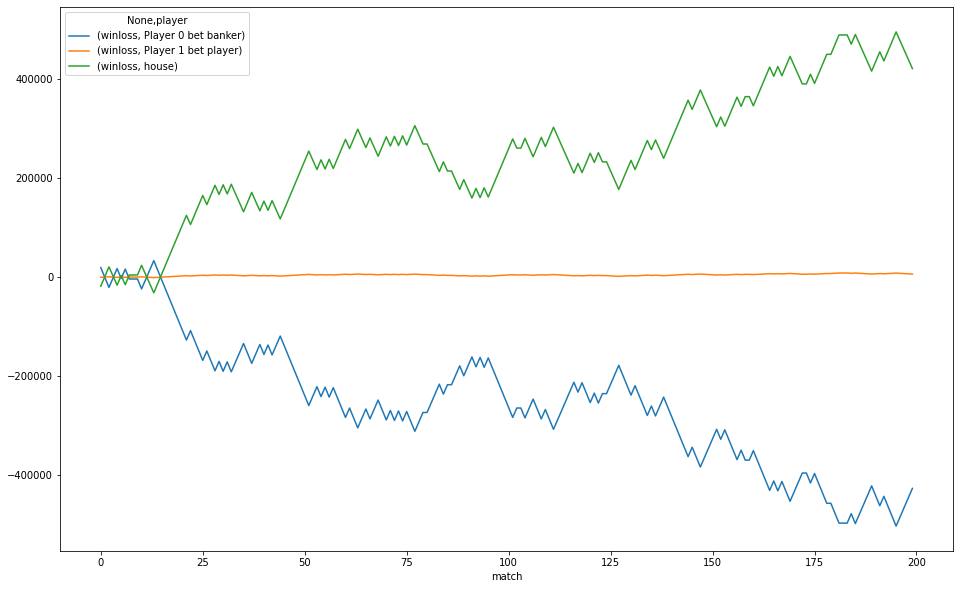

200


result
player    0.515
banker    0.430
tie       0.055
dtype: float64


player  Player 0 bet banker  Player 1 bet player     house
match                                                     
199               -426000.0               5925.0  420075.0


player
Player 0 bet banker   -502000.0
Player 1 bet player     -1125.0
house                  -31875.0
dtype: float64


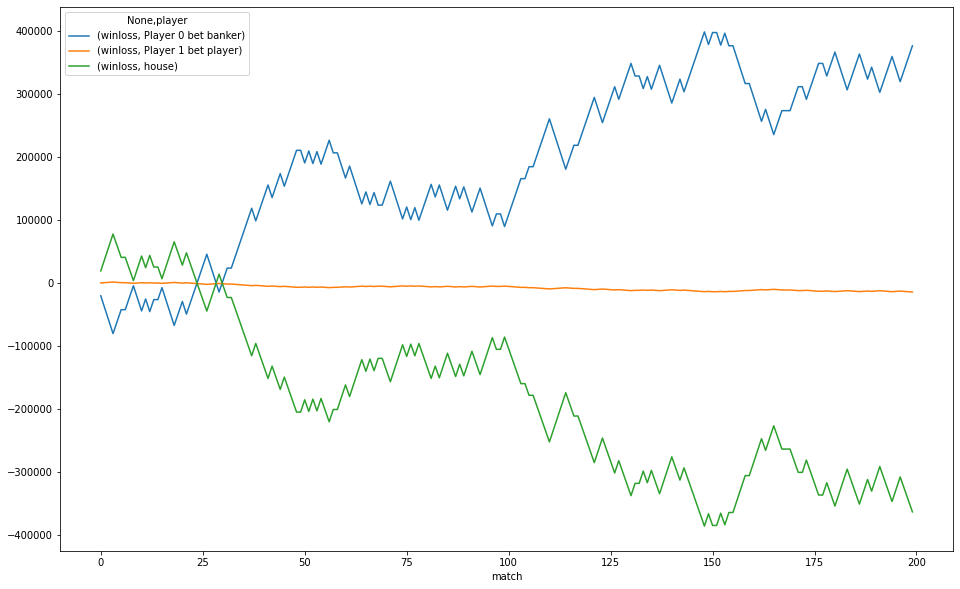

200


result
banker    0.515
player    0.395
tie       0.090
dtype: float64


player  Player 0 bet banker  Player 1 bet player     house
match                                                     
199                377000.0             -13975.0 -363025.0


player
Player 0 bet banker    -80000.0
Player 1 bet player    -13975.0
house                 -385575.0
dtype: float64


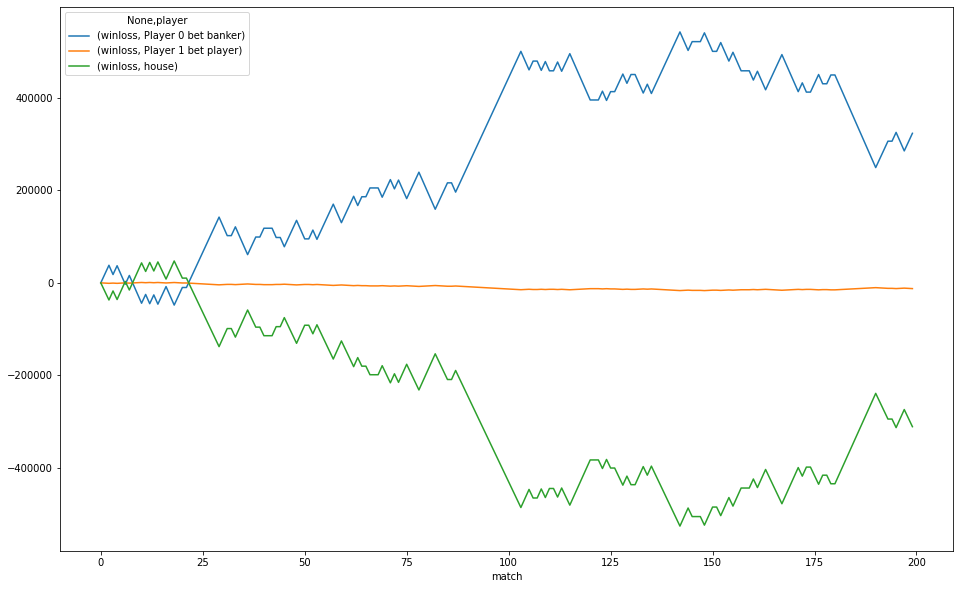

200


result
banker    0.485
player    0.380
tie       0.135
dtype: float64


player  Player 0 bet banker  Player 1 bet player     house
match                                                     
199                323000.0             -12400.0 -310600.0


player
Player 0 bet banker    -48000.0
Player 1 bet player    -16725.0
house                 -525325.0
dtype: float64


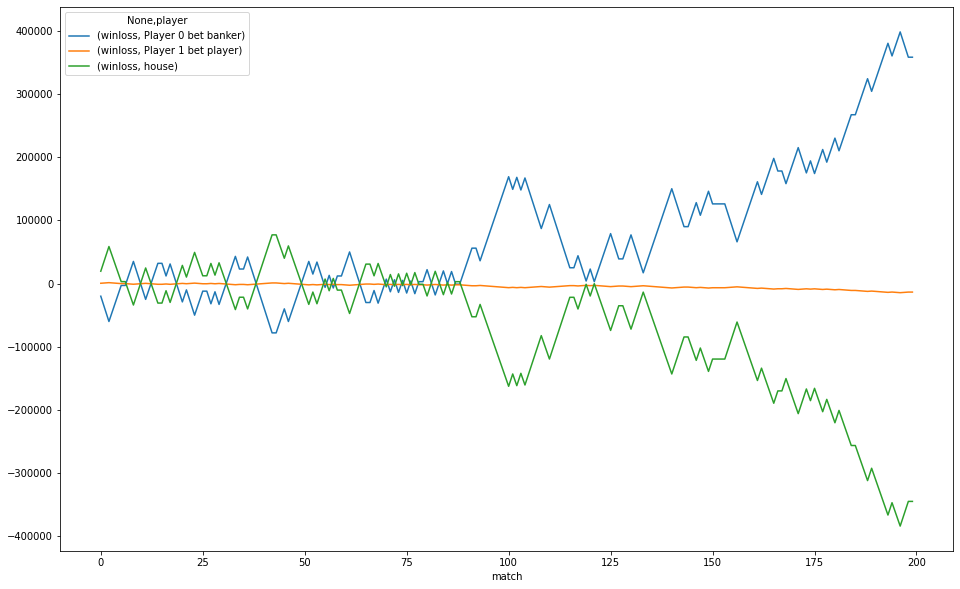

200


result
banker    0.510
player    0.395
tie       0.095
dtype: float64


player  Player 0 bet banker  Player 1 bet player     house
match                                                     
199                358000.0             -13475.0 -344525.0


player
Player 0 bet banker    -78000.0
Player 1 bet player    -14425.0
house                 -383575.0
dtype: float64


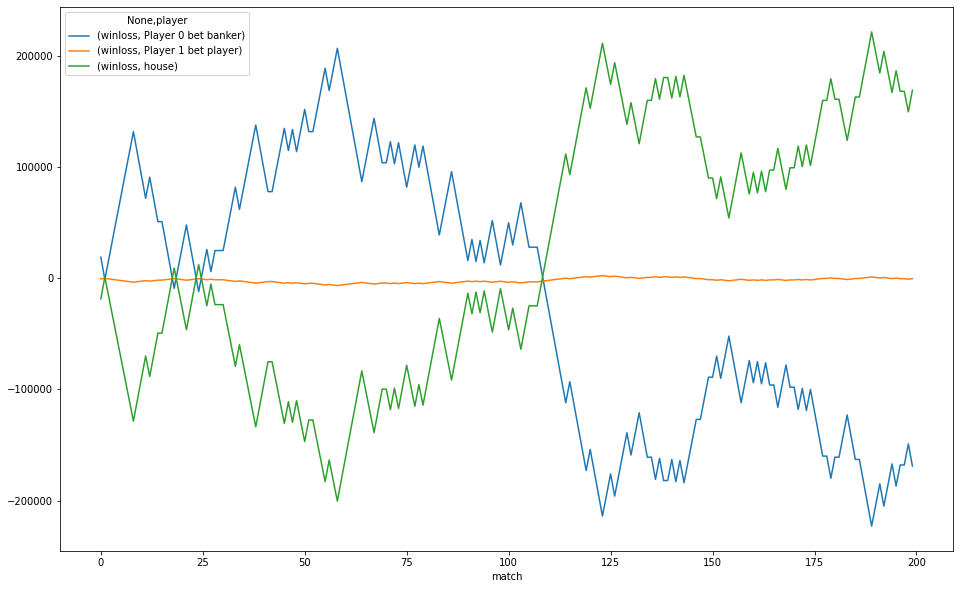

200


result
player    0.465
banker    0.445
tie       0.090
dtype: float64


player  Player 0 bet banker  Player 1 bet player     house
match                                                     
199               -169000.0               -325.0  169325.0


player
Player 0 bet banker   -223000.0
Player 1 bet player     -6525.0
house                 -200475.0
dtype: float64


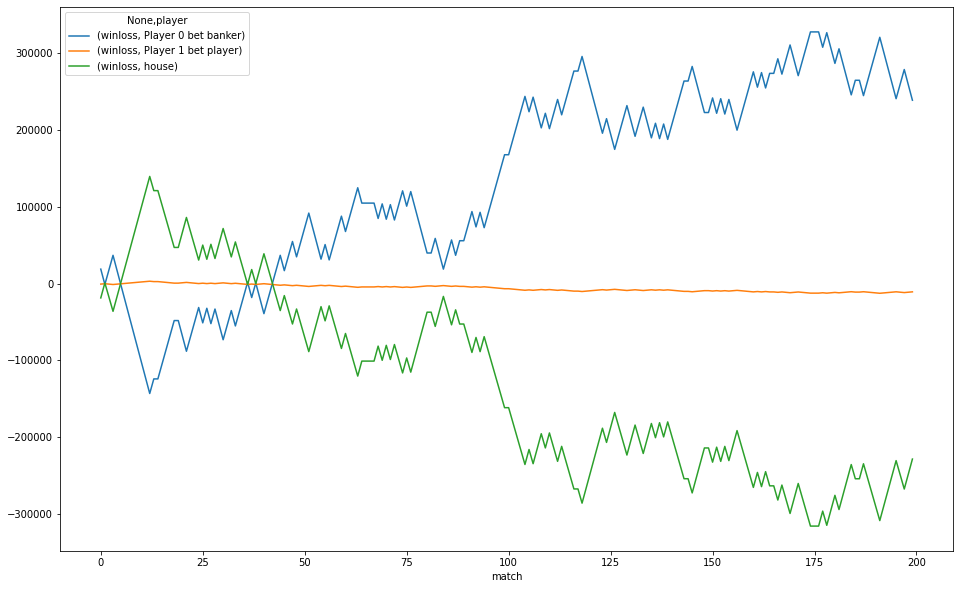

200


result
banker    0.505
player    0.420
tie       0.075
dtype: float64


player  Player 0 bet banker  Player 1 bet player     house
match                                                     
199                239000.0             -10600.0 -228400.0


player
Player 0 bet banker   -143000.0
Player 1 bet player    -12450.0
house                 -315725.0
dtype: float64


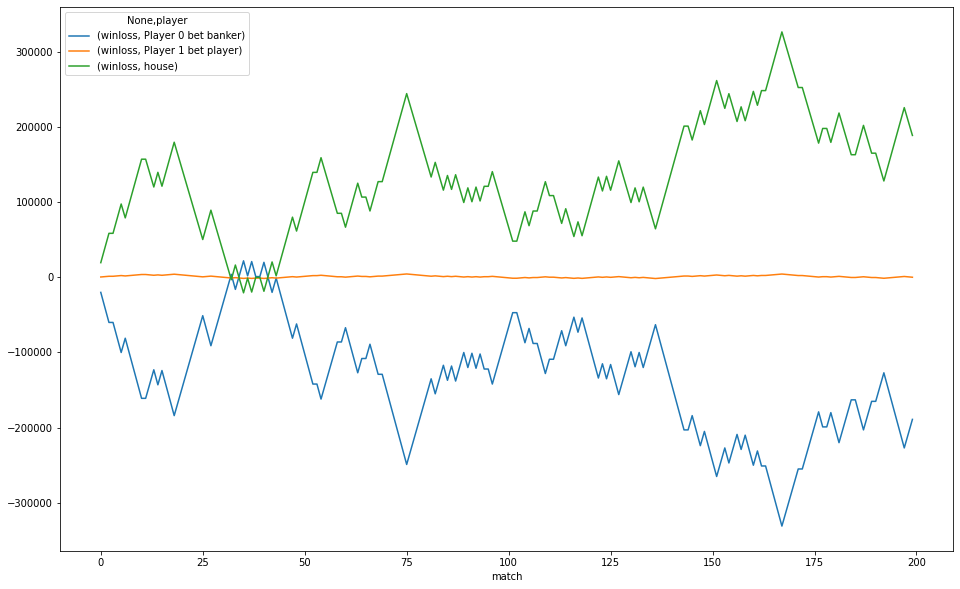

200


result
player    0.470
banker    0.445
tie       0.085
dtype: float64


player  Player 0 bet banker  Player 1 bet player     house
match                                                     
199               -189000.0                150.0  188850.0


player
Player 0 bet banker   -331000.0
Player 1 bet player     -1575.0
house                  -20600.0
dtype: float64


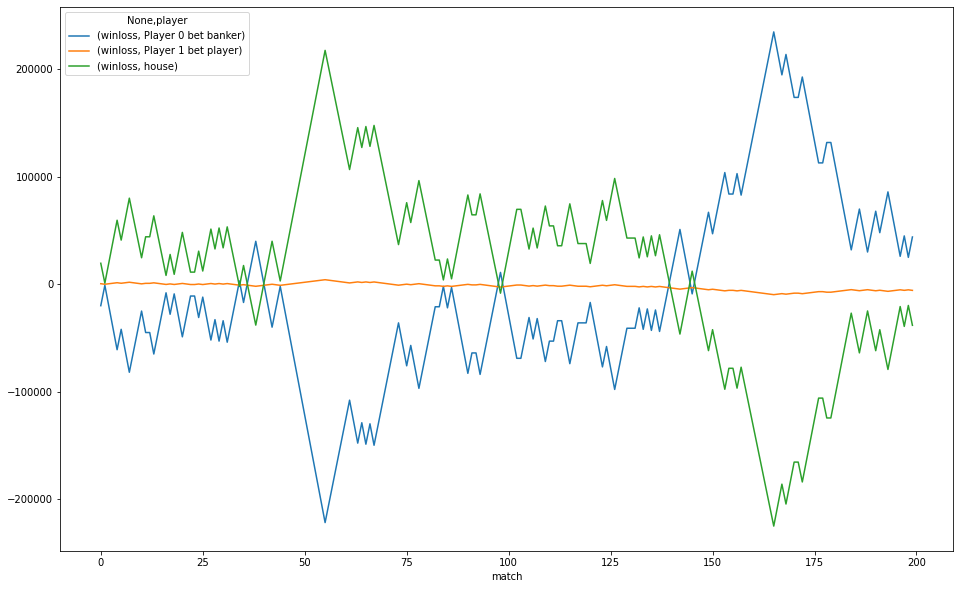

200


result
banker    0.480
player    0.445
tie       0.075
dtype: float64


player  Player 0 bet banker  Player 1 bet player    house
match                                                    
199                 44000.0              -5725.0 -38275.0


player
Player 0 bet banker   -222000.0
Player 1 bet player     -9725.0
house                 -225275.0
dtype: float64


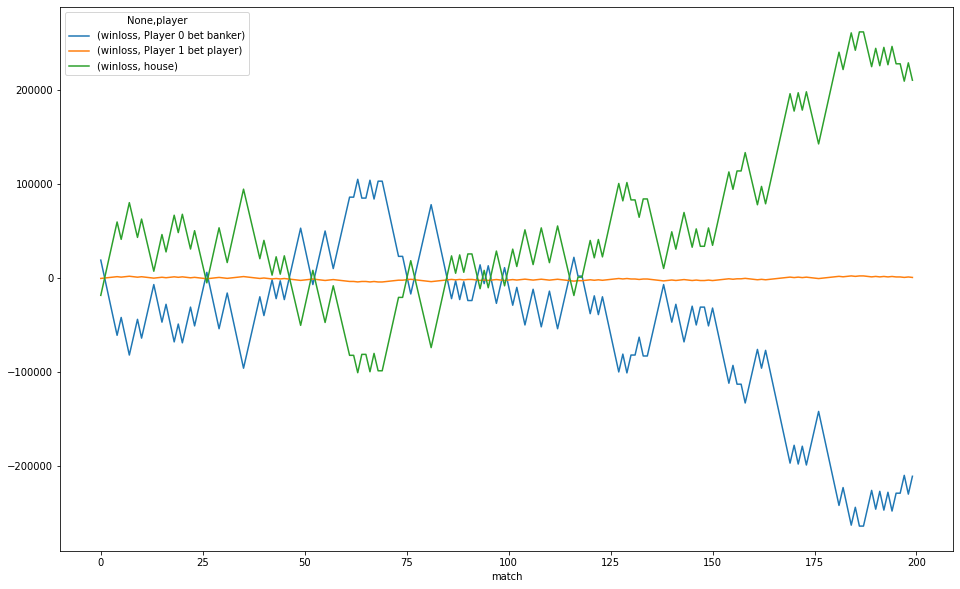

200


result
player    0.485
banker    0.455
tie       0.060
dtype: float64


player  Player 0 bet banker  Player 1 bet player     house
match                                                     
199               -211000.0                575.0  210425.0


player
Player 0 bet banker   -264000.0
Player 1 bet player     -4250.0
house                 -100800.0
dtype: float64


In [3]:
# Test case 1
# * define 2 players and their bet hand and amount
# * each player's bet amount is largely different (e.g. one 500, one 20,000)
# Conclusion
# * win-loss seems random
num_test = 10
num_matches = 200
bets = [
    {'bet': BET_BANKER, 'amount': 20000},
    {'bet': BET_PLAYER, 'amount': 500},
]
# test cases of number of matches to play
test_matches = [num_matches for _ in range(num_test)]

display(HTML('<h1>Test 1 - Two player different bet ammount comparison:</h1>'))
for imatch, num_matches in enumerate(test_matches):
    display(HTML('<h2>Match [{0}]:</h2>'.format(imatch)))
    player = {i: Player("Player {0} bet {1}".format(i, bet['bet']), initial_balance) for i, bet in enumerate(bets)}
    baccarat = Baccarat(player, probability_banker, probability_player, probability_tie)
    for i, bet in enumerate(bets):
        player[i].place_bet(bet['bet'], bet['amount'])
    for i in range(num_matches):
        result = baccarat.deal()
        baccarat.conclude(result)
    bet_record_df = baccarat.df()
    show_result(bet_record_df)


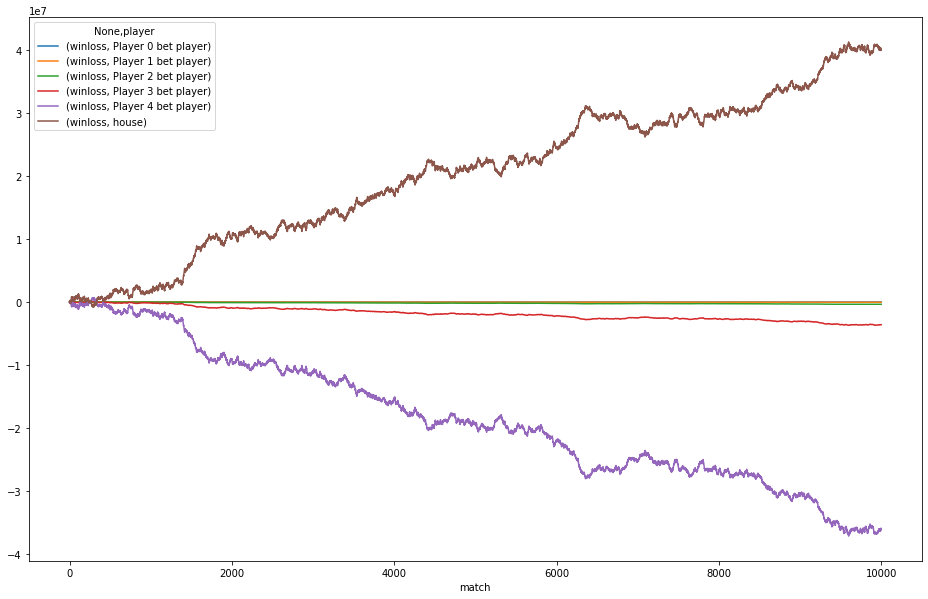

10000


result
banker    0.4669
player    0.4536
tie       0.0795
dtype: float64


player  Player 0 bet player  Player 1 bet player  Player 2 bet player  \
match                                                                   
9999                -3598.0             -35980.0            -359800.0   

player  Player 3 bet player  Player 4 bet player       house  
match                                                         
9999             -3598000.0          -35980000.0  39977378.0  


player
Player 0 bet player       -3718.5
Player 1 bet player      -37185.0
Player 2 bet player     -371850.0
Player 3 bet player    -3718500.0
Player 4 bet player   -37185000.0
house                   -772214.5
dtype: float64


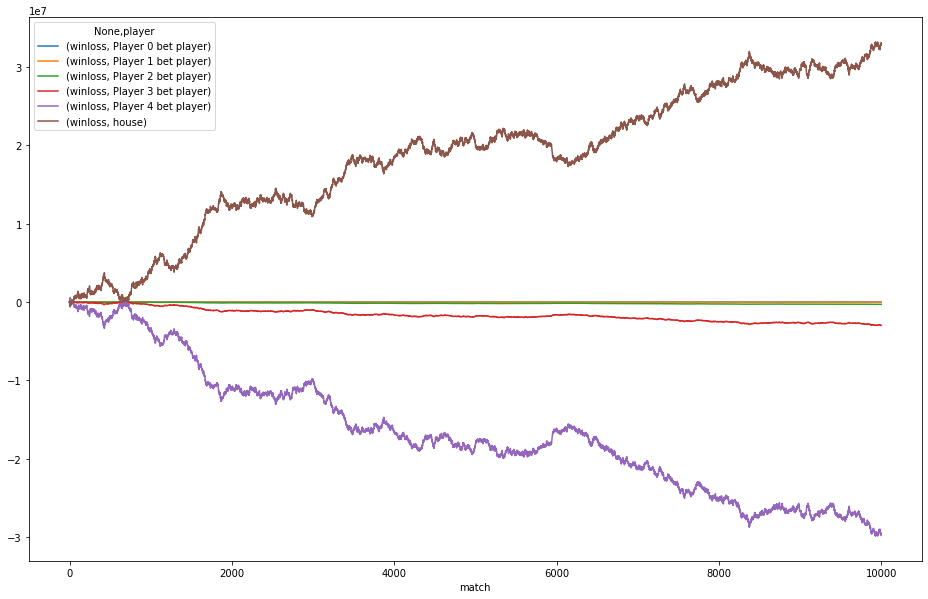

10000


result
banker    0.4659
player    0.4591
tie       0.0750
dtype: float64


player  Player 0 bet player  Player 1 bet player  Player 2 bet player  \
match                                                                   
9999                -2975.5             -29755.0            -297550.0   

player  Player 3 bet player  Player 4 bet player       house  
match                                                         
9999             -2975500.0          -29755000.0  33060780.5  


player
Player 0 bet player       -2984.0
Player 1 bet player      -29840.0
Player 2 bet player     -298400.0
Player 3 bet player    -2984000.0
Player 4 bet player   -29840000.0
house                   -622216.0
dtype: float64


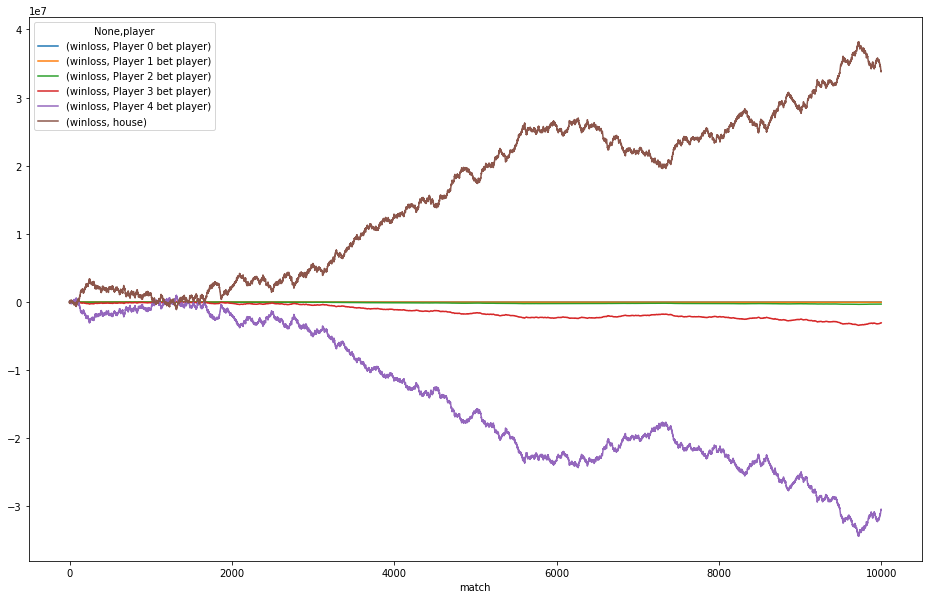

10000


result
banker    0.4654
player    0.4578
tie       0.0768
dtype: float64


player  Player 0 bet player  Player 1 bet player  Player 2 bet player  \
match                                                                   
9999                -3049.0             -30490.0            -304900.0   

player  Player 3 bet player  Player 4 bet player       house  
match                                                         
9999             -3049000.0          -30490000.0  33877439.0  


player
Player 0 bet player       -3435.0
Player 1 bet player      -34350.0
Player 2 bet player     -343500.0
Player 3 bet player    -3435000.0
Player 4 bet player   -34350000.0
house                  -1116655.5
dtype: float64


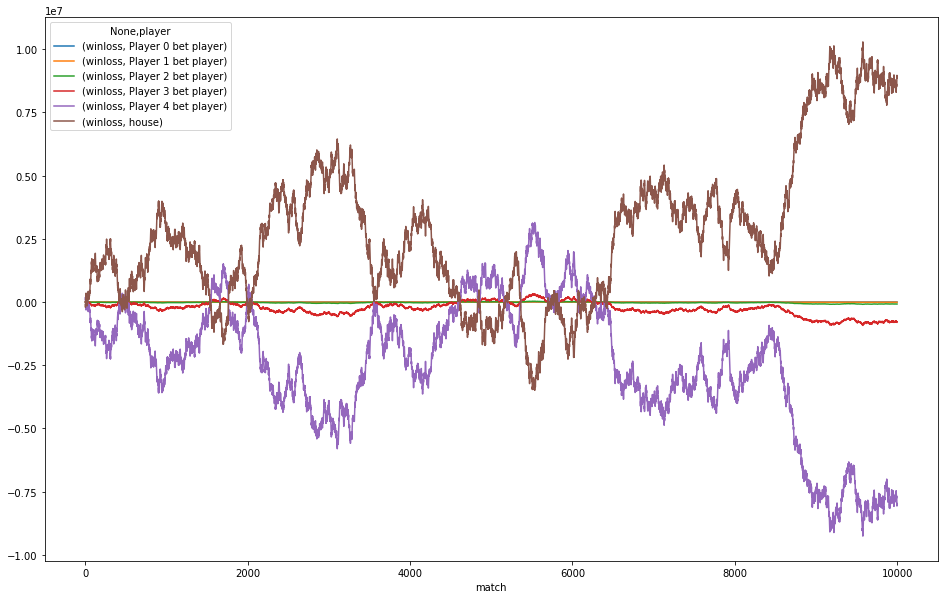

10000


result
player    0.4655
banker    0.4502
tie       0.0843
dtype: float64


player  Player 0 bet player  Player 1 bet player  Player 2 bet player  \
match                                                                   
9999                 -797.5              -7975.0             -79750.0   

player  Player 3 bet player  Player 4 bet player      house  
match                                                        
9999              -797500.0           -7975000.0  8861022.5  


player
Player 0 bet player       -926.0
Player 1 bet player      -9260.0
Player 2 bet player     -92600.0
Player 3 bet player    -926000.0
Player 4 bet player   -9260000.0
house                 -3494409.5
dtype: float64


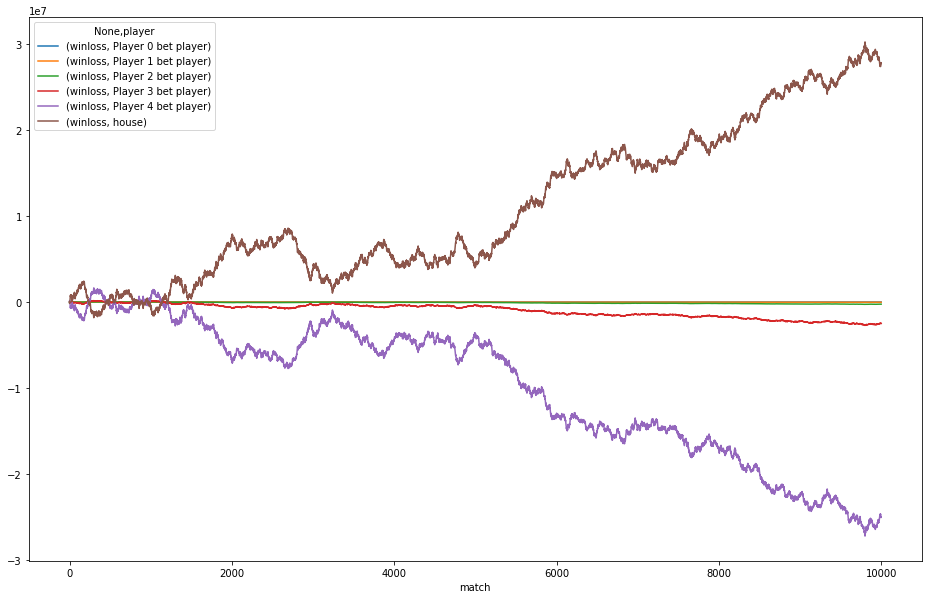

10000


result
banker    0.4602
player    0.4581
tie       0.0817
dtype: float64


player  Player 0 bet player  Player 1 bet player  Player 2 bet player  \
match                                                                   
9999                -2500.5             -25005.0            -250050.0   

player  Player 3 bet player  Player 4 bet player       house  
match                                                         
9999             -2500500.0          -25005000.0  27783055.5  


player
Player 0 bet player       -2727.0
Player 1 bet player      -27270.0
Player 2 bet player     -272700.0
Player 3 bet player    -2727000.0
Player 4 bet player   -27270000.0
house                  -1827759.5
dtype: float64


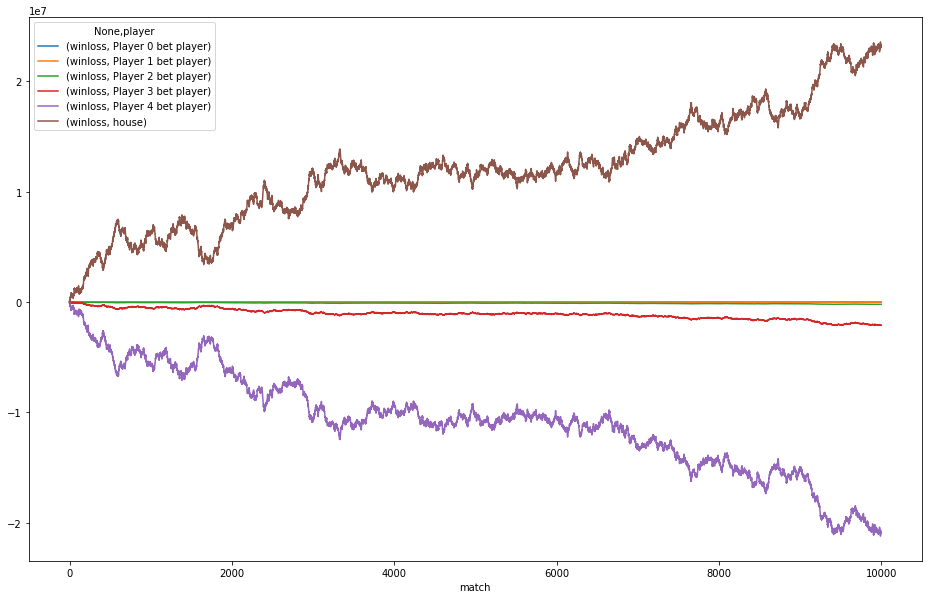

10000


result
player    0.4628
banker    0.4606
tie       0.0766
dtype: float64


player  Player 0 bet player  Player 1 bet player  Player 2 bet player  \
match                                                                   
9999                -2094.0             -20940.0            -209400.0   

player  Player 3 bet player  Player 4 bet player       house  
match                                                         
9999             -2094000.0          -20940000.0  23266434.0  


player
Player 0 bet player       -2121.0
Player 1 bet player      -21210.0
Player 2 bet player     -212100.0
Player 3 bet player    -2121000.0
Player 4 bet player   -21210000.0
house                   -105554.5
dtype: float64


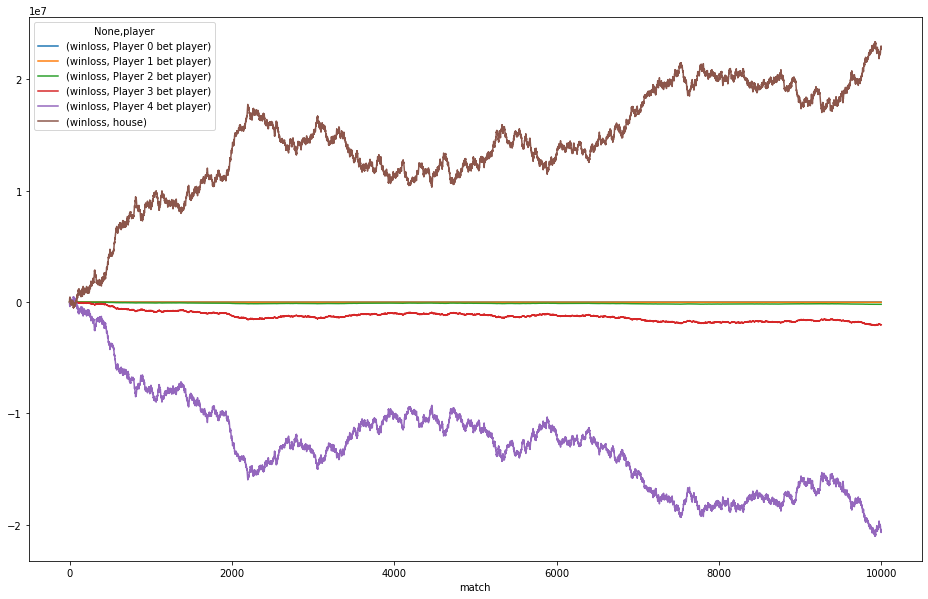

10000


result
player    0.4599
banker    0.4575
tie       0.0826
dtype: float64


player  Player 0 bet player  Player 1 bet player  Player 2 bet player  \
match                                                                   
9999                -2059.5             -20595.0            -205950.0   

player  Player 3 bet player  Player 4 bet player       house  
match                                                         
9999             -2059500.0          -20595000.0  22883104.5  


player
Player 0 bet player       -2101.5
Player 1 bet player      -21015.0
Player 2 bet player     -210150.0
Player 3 bet player    -2101500.0
Player 4 bet player   -21015000.0
house                   -527772.5
dtype: float64


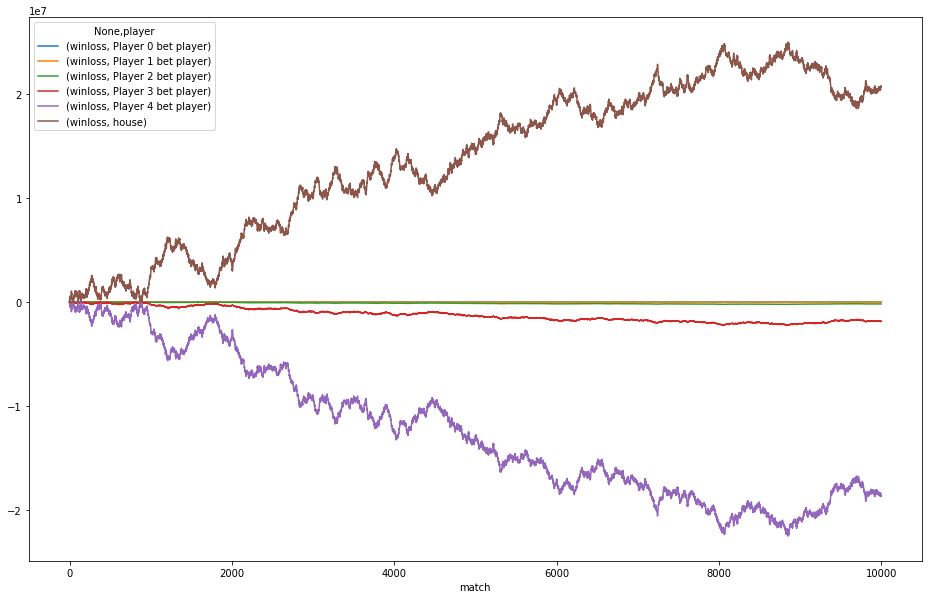

10000


result
player    0.4615
banker    0.4570
tie       0.0815
dtype: float64


player  Player 0 bet player  Player 1 bet player  Player 2 bet player  \
match                                                                   
9999                -1857.5             -18575.0            -185750.0   

player  Player 3 bet player  Player 4 bet player       house  
match                                                         
9999             -1857500.0          -18575000.0  20638682.5  


player
Player 0 bet player       -2249.5
Player 1 bet player      -22495.0
Player 2 bet player     -224950.0
Player 3 bet player    -2249500.0
Player 4 bet player   -22495000.0
house                    -99999.0
dtype: float64


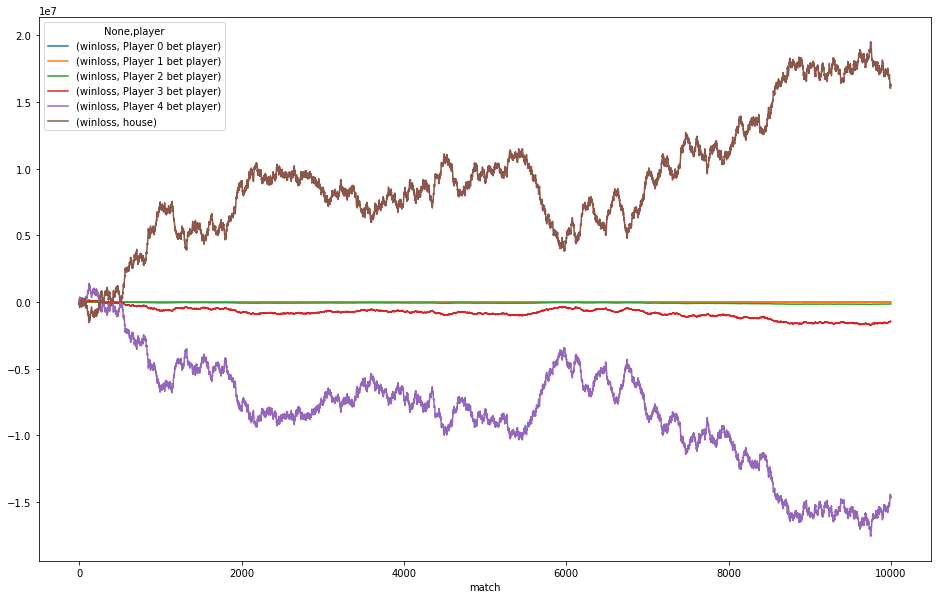

10000


result
player    0.4625
banker    0.4540
tie       0.0835
dtype: float64


player  Player 0 bet player  Player 1 bet player  Player 2 bet player  \
match                                                                   
9999                -1462.5             -14625.0            -146250.0   

player  Player 3 bet player  Player 4 bet player       house  
match                                                         
9999             -1462500.0          -14625000.0  16249837.5  


player
Player 0 bet player       -1756.5
Player 1 bet player      -17565.0
Player 2 bet player     -175650.0
Player 3 bet player    -1756500.0
Player 4 bet player   -17565000.0
house                  -1533318.0
dtype: float64


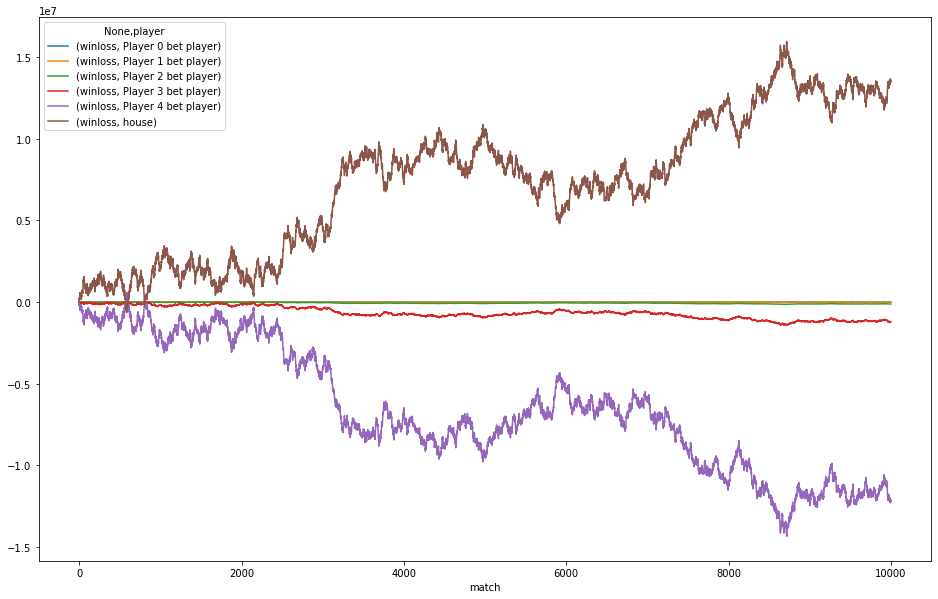

10000


result
player    0.4643
banker    0.4533
tie       0.0824
dtype: float64


player  Player 0 bet player  Player 1 bet player  Player 2 bet player  \
match                                                                   
9999                -1221.5             -12215.0            -122150.0   

player  Player 3 bet player  Player 4 bet player       house  
match                                                         
9999             -1221500.0          -12215000.0  13572086.5  


player
Player 0 bet player       -1433.0
Player 1 bet player      -14330.0
Player 2 bet player     -143300.0
Player 3 bet player    -1433000.0
Player 4 bet player   -14330000.0
house                   -649993.5
dtype: float64


In [4]:
# Test case 2
# * define many players and their bet hand and amount
# * each player's bet amount is different in order to show their relationship
# Conclusion
num_test = 10
num_matches = 10000
bets = [
    {'bet': BET_PLAYER, 'amount': 10},
    {'bet': BET_PLAYER, 'amount': 100},
    {'bet': BET_PLAYER, 'amount': 1000},
    {'bet': BET_PLAYER, 'amount': 10000},
    {'bet': BET_PLAYER, 'amount': 100000},
]
# test cases of number of matches to play
test_matches = [num_matches for _ in range(num_test)]

display(HTML('<h1>Test 2 - Different player different bet ammount comparison:</h1>'))
for imatch, num_matches in enumerate(test_matches):
    display(HTML('<h2>Match [{0}]:</h2>'.format(imatch)))
    player = {i: Player("Player {0} bet {1}".format(i, bet['bet']), initial_balance) for i, bet in enumerate(bets)}
    baccarat = Baccarat(player, probability_banker, probability_player, probability_tie)
    for i, bet in enumerate(bets):
        player[i].place_bet(bet['bet'], bet['amount'])
    for i in range(num_matches):
        result = baccarat.deal()
        baccarat.conclude(result)
    bet_record_df = baccarat.df()
    show_result(bet_record_df)


In [5]:
display(HTML('<h1>All tests finished.</h1>'))
